In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
#오늘의 과제
#1)학생의 성적을 받는 로직 구현(use DataFrame)
#2)학생의 성적을 토대로 분류 모델 머신러닝 구현(use Classifier)

In [2]:
#1.반복문 + break;
#학생 성적을 계속 받아서 데이터에 저장하는 로직
# while:
#     input('이름을 작성하시오') #중복 조심
#     input('국어 성적을 입력하시오')
    #데이터 프레임에 저장
#extra. 이상치, 결손값 같은 데이터 불균형 상황을 어떤 프로세스로 작업을 할지 생각하기
#ex) 데이터 입력도중에 점수가 100점 이하여야만 하는데 오타로 405점 같은 100점 이상의 데이터가 들어갈 경우 

#2. 저장된 데이터 프레임을 csv확장자로 저장하기
#3. csv로 저장된 데이터 불러와서 데이터프레임에 저장
#(csv를 코드 초기에 불러오는 로직을 구현하여 DB대체 사용)

In [3]:
global df
df = pd.DataFrame(index=range(0,0), columns = ['이름','국어','수학','물리','세계사','분류'])

In [4]:
def insert():
    global df
    name = input('이름을 작성하시오')
    if (df.이름 == name).any():
        name = input('중복된 이름입니다. 다시 입력하세요')
    else:
        Korean = input('국어 성적을 입력하시오')
        Math = input('수학 성적을 입력하시오')
        Physic = input('물리 성적을 입력하시오')
        History = input('세계사 성적을 입력하시오')
        Category = input('과를 입력하시오')
        df.loc[len(df)]=[name, Korean, Math, Physic, History, Category]
        
        # Korean = input('국어 성적을 입력하시오')
        # if (Korean == '') or (int(Korean) > 100):
        #     Korean = input('국어 성적을 다시 입력하시오')
        # else: 
        #     Math = input('수학 성적을 입력하시오')
        #     if(Math == '') or (int(Math) > 100):
        #         Math = input('수학 성적을 다시 입력하시오')
        #     else:
        #         Physic = input('물리 성적을 입력하시오')
        #         if(Physic == '') or (int(Physic) > 100):
        #             Physic = input('물리 성적을 다시 입력하시오')
        #         else:
        #             History = input('세계사 성적을 입력하시오')
        #             if(History == '') or (int(History) > 100):
        #                 History = input('세계사 성적을 다시 입력하시오')
        #             else:
        #                 df.loc[len(df)]=[name, Korean, Math, Physic, History]
   
                
def info() :
    global df
    print(df)
    
def saveCSV():
    global df
    df.to_csv('./studentGrade.csv', index=False)
    
def loadCSV():
    global df
    file_path = './studentGrade.csv'
    df = pd.read_csv(file_path)
    
def viewGraph():
    global df
    df.수학[:].plot(kind='bar', rot=0)
    
def mathDataInfo():
    global df
    mathData = df.iloc[:,2:3]
    print(mathData)

#데이터 불러오고, 0~100점 사이의 값이 없을 경우 (이상치)
#데이터 자체가 없을 경우(결손값)  => 두 경우 모두 평균값으로 대체
#데이터 불러왔을 때 과목 이름의 따라 (column 에 따라 ) 평균값이 달라짐
#결손값은 null값 혹은 0값 찾고, 이상치는 0~100점 사이 외의 값 찾기
#df.loc[df['수학'] == 조건넣기, ('수학')] = 바뀔 평균값
#axis : axis='rows' =row(튜플)기준으로 값을 도출
#numeric_only=True : 데이터는 반드시 숫자로 인식한다는 옵션(데이터 갯수 인식 포함)
def dataFix():
    global df
    #1)컬럼마다 평균값 구하기
    # kavg = df['국어'].mean()
    # mavg = df['수학'].mean()
    # pavg = df['물리'].mean()
    # havg = df['세계사'].mean()
    avg = df.mean(axis='rows', numeric_only=True)
    #2)컬럼의 결손 위치, 이상 위치를 찾아서 업데이트 
    # global df
    count = 0
    for count in range(len(df.index)):
        k = 1
        for i in range(len(df.columns)):
            if (df.iloc[count,k] == ' ') or (int(df.iloc[count,k]) == 0) or (int(df.iloc[count,k]) > 100):
                df.iloc[count,k] = df.iloc[:,k].mean()
            else: 
                break
            k=k+1
        count=count+1
    print(df)
    # count = 1
    # for i in avg:
    #     df.loc[df.iloc[:,count] > 100, df.columns[count]] = round(i)
    #     df.loc[df.iloc[:,count] < 0, df.columns[count]] = round(i)
    #     count = count+1
    # print(df)

In [12]:
mathDataInfo()

    수학
0   70
1   95
2  100
3   85
4   90
5   95


In [31]:
#데이터는 반복문 밖에서 불러오면 단 1번만 실행하므로 불확정 요소 연산을 줄일수 있다. 
#계속 반복적으로 csv파일을 로드하는 작업은 컴퓨터에 부하를 야기할 수 있다. 
loadCSV()
info()
while True:
    choice = input('학생 성적을 입력하시겠습니까? 혹은 끝내겠습니까?')
    if choice == 'y':
        insert()
    else: 
        info()
        saveCSV()
        break

    이름   국어   수학  물리  세계사  분류
0  정문희  100   70  70   90  문과
1  정슬기   80   95  90   65  이과
2  김택선   95  100  85   85  이과
3  김시연  100   85  85   95  문과
4  나문희  100   90  80   85  문과
5  정만식   75   95  86   74  이과


학생 성적을 입력하시겠습니까? 혹은 끝내겠습니까? y
이름을 작성하시오 이나연
국어 성적을 입력하시오 98
수학 성적을 입력하시오 87
물리 성적을 입력하시오 84
세계사 성적을 입력하시오 96
과를 입력하시오 문과
학생 성적을 입력하시겠습니까? 혹은 끝내겠습니까? y
이름을 작성하시오 성해은
국어 성적을 입력하시오 69
수학 성적을 입력하시오 85
물리 성적을 입력하시오 87
세계사 성적을 입력하시오 78
과를 입력하시오 이과
학생 성적을 입력하시겠습니까? 혹은 끝내겠습니까? y
이름을 작성하시오 박나언
국어 성적을 입력하시오 93
수학 성적을 입력하시오 95
물리 성적을 입력하시오 78
세계사 성적을 입력하시오 74
과를 입력하시오 이과
학생 성적을 입력하시겠습니까? 혹은 끝내겠습니까? y
이름을 작성하시오 김지수
국어 성적을 입력하시오 88
수학 성적을 입력하시오 87
물리 성적을 입력하시오 85
세계사 성적을 입력하시오 86
과를 입력하시오 문과
학생 성적을 입력하시겠습니까? 혹은 끝내겠습니까? y
이름을 작성하시오 이지연
국어 성적을 입력하시오 78
수학 성적을 입력하시오 75
물리 성적을 입력하시오 74
세계사 성적을 입력하시오 73
과를 입력하시오 이과
학생 성적을 입력하시겠습니까? 혹은 끝내겠습니까? n


     이름   국어   수학  물리 세계사  분류
0   정문희  100   70  70  90  문과
1   정슬기   80   95  90  65  이과
2   김택선   95  100  85  85  이과
3   김시연  100   85  85  95  문과
4   나문희  100   90  80  85  문과
5   정만식   75   95  86  74  이과
6   이나연   98   87  84  96  문과
7   성해은   69   85  87  78  이과
8   박나언   93   95  78  74  이과
9   김지수   88   87  85  86  문과
10  이지연   78   75  74  73  이과


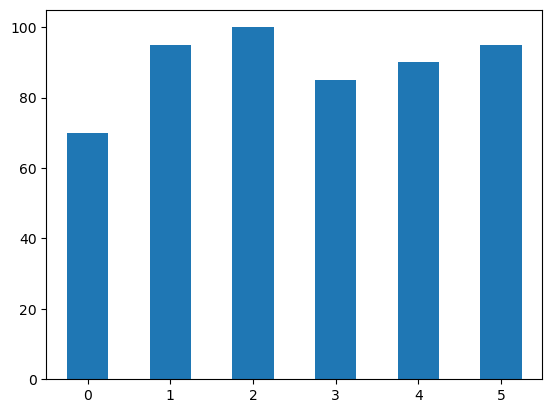

In [11]:
viewGraph()

In [34]:
loadCSV()
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
print(y)

0     문과
1     이과
2     이과
3     문과
4     문과
5     이과
6     문과
7     이과
8     이과
9     문과
10    이과
Name: 분류, dtype: object


In [15]:
from sklearn.model_selection import train_test_split

In [35]:
#학습용 모델링 만들기
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=1)


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [38]:
#DecisionTreeClassifier 알고리즘으로 모델 형태 만들기
dt_model = DecisionTreeClassifier(random_state = 1)
#학습진행
dt_model.fit(train_X, train_y)
#검증진행
dt_model.predict(test_X)
dt_pred_y = dt_model.predict(test_X)
#테이블 모형으로 예측결과 출력하기
pd.crosstab(test_y, dt_pred_y)


col_0,문과
분류,
문과,2
이과,1


In [39]:
#MLPCloassifier 알고리즘 모델 형태 만들기
mlp_model = MLPClassifier(hidden_layer_sizes=(100,200,50,20),max_iter=500,random_state=1)
mlp_model.fit(train_X, train_y)
mlp_model.predict(test_X)
mlp_pred_y = mlp_model.predict(test_X)
pd.crosstab(test_y, dt_pred_y)

col_0,문과
분류,
문과,2
이과,1


In [40]:
from sklearn.preprocessing import scale

In [44]:
#표준편차 : 평균에서 얼마나 떨어져 있는지를 절대값으로 표현
#절대값 : 양수로 계산된 떨어진 범위(음, 양수를 모두 양수로 표현)
scaledTest = scale(X)
scaledTest[:5, :]

scaledTest.std(axis=0)

array([1., 1., 1., 1.])

In [58]:
#문과 학생 점수와 이과 학생의 각 과목 점수가 어느쪽이 더 높은지 출력하시오
def gradeCompare():
    global df
    #문과 학생 데이터프레임과 평균값 출력
    k = df.loc[df.분류 == '문과']
    # count = 1
    # for i in range(len(df.columns)):
    #     i = k.iloc[:,count].mean()
    #     print(i)
    #     count=count+1
    Kor = k.iloc[:,1].mean()
    Ma = k.iloc[:,2].mean()
    Phy = k.iloc[:,3].mean()
    Hi = k.iloc[:,4].mean()
    #이과 학생 데이터프레임과 평균값 출력
    m = df.loc[df.분류 == '이과']
    kor = m.iloc[:,1].mean()
    ma = m.iloc[:,2].mean()
    phy = m.iloc[:,3].mean()
    hi = m.iloc[:,4].mean()
    #문과 이과 컬럼별 점수 비교
    if Kor > kor:
        print('국어점수 - 문과가 높음')
    else:
        print('국어점수 - 이과가 높음')
    if Ma > ma:
        print('수학점수 - 문과가 높음')
    else:
        print('수학점수 - 이과가 높음')
    if Phy > phy:
        print('물리점수 - 문과가 높음')
    else:
        print('물리점수 - 이과가 높음')
    if Hi > hi:
        print('세계사 점수 - 문과가 높음')
    else:
        print('세계사 점수 - 이과가 높음')
    

In [61]:
k = df.loc[df.분류 == '문과']
print(k)
Kor = k.iloc[:,1].mean()
print(Kor)
# count = 1
# for i in range(len(df.columns)):
#     i = k.iloc[:,count].mean()
#     print(i)
#     count=count+1

    이름   국어  수학  물리  세계사  분류
0  정문희  100  70  70   90  문과
3  김시연  100  85  85   95  문과
4  나문희  100  90  80   85  문과
6  이나연   98  87  84   96  문과
9  김지수   88  87  85   86  문과
97.2


In [59]:
gradeCompare()

국어점수 - 문과가 높음
수학점수 - 이과가 높음
물리점수 - 이과가 높음
세계사 점수 - 문과가 높음


In [64]:
def Compare():
    global df
    lib_df = df[df.분류 =='문과']
    lib_avg = lib_df.mean(axis='rows', numeric_only = True)
    print(lib_avg)
    sci_df = df[df.분류 =='이과']
    sci_avg = sci_df.mean(axis='rows', numeric_only=True)
    count=0
    for i in lib_avg:
        if lib_avg[count] > sci_avg[count]:
            print('문과가 ', lib_avg-sci_avg, '만큼 이과보다 더 높습니다.')
        else:
            print('이과가 ', sci_avg-lib_avg, '만큼 문과보다 더 높습니다.')
        count=count+1

In [65]:
Compare()

국어     97.2
수학     83.8
물리     80.8
세계사    90.4
dtype: float64
문과가  국어     15.533333
수학     -7.033333
물리     -2.533333
세계사    15.566667
dtype: float64 만큼 이과보다 더 높습니다.
이과가  국어    -15.533333
수학      7.033333
물리      2.533333
세계사   -15.566667
dtype: float64 만큼 문과보다 더 높습니다.
이과가  국어    -15.533333
수학      7.033333
물리      2.533333
세계사   -15.566667
dtype: float64 만큼 문과보다 더 높습니다.
문과가  국어     15.533333
수학     -7.033333
물리     -2.533333
세계사    15.566667
dtype: float64 만큼 이과보다 더 높습니다.
